<a href="https://colab.research.google.com/github/ssrivastava836/demorepo/blob/master/GRIPT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 2:- To Explore Supervised Machine Learning
**Prediction of score based upon the number of hours of study using Linear Regression Model**

In [3]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing the dataset to work upon
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("-:Dataset is successfully imported:-")

-:Dataset is successfully imported:-


In [5]:
#Preparing the dataset
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [6]:
#Checking top 5 entries
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#checking the information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Checking the shape of the dataset
data.shape

(25, 2)

In [9]:
#Getting the data description
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#Checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
#Take a look at X
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [12]:
#Take a look at y
print(y)


[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Visualise our Dataset with graphs:-

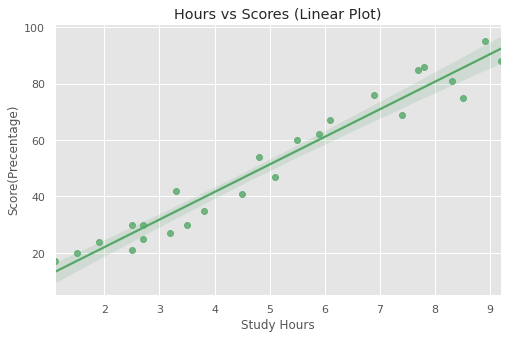

In [13]:
#plotting Hours vs Scores
sns.set(rc={'figure.figsize':(8,5)})
plt.style.use('ggplot')
sns.regplot(X,y,color='g')
plt.title('Hours vs Scores (Linear Plot)')  
plt.xlabel('Study Hours')  
plt.ylabel('Score(Precentage)')
plt.show()

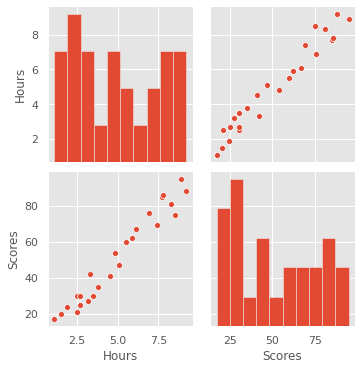

In [14]:
sns.pairplot(data)

From here only the positive correlation between the Hours of study and the percentage scores is clear.

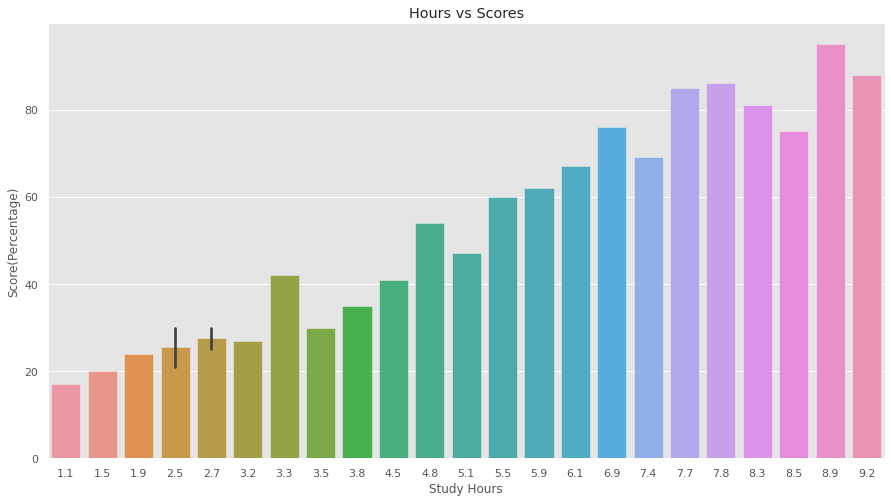

In [15]:
#Let's see the relation in Barplot
sns.set(rc={'figure.figsize':(15,8)})
plt.style.use('ggplot')
sns.barplot(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs Scores')  
plt.xlabel('Study Hours')  
plt.ylabel('Score(Percentage)')
plt.show()

It is also showing the linear relationship clearly.

# **Splitting the Dataset into train and test data:-**

In [16]:
#splitting the dataset using Scikit-Learn library
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.22, random_state=96)

Checking the train-test data-shape:-

In [17]:
X_train.shape, y_train.shape

((19, 1), (19,))

In [18]:
X_test.shape,y_test.shape

((6, 1), (6,))

# **Traing the Linear Regression Model:-**

In [19]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training completed successfully.

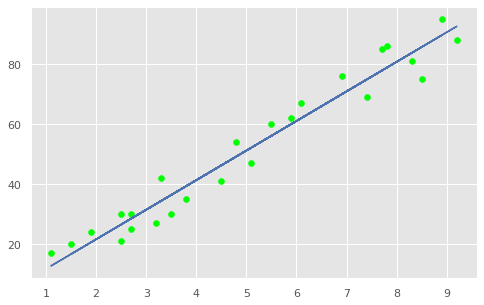

In [20]:
# Plotting the regression line
reg_line = LR.coef_* X + LR.intercept_

# Plotting reg_line for our data
plt.figure(figsize=(8,5))
plt.scatter(X, y,color="lime")
plt.plot(X, reg_line,color='b');
plt.show()

# **Prediction of result using test data:-**

In [21]:
y_predict = LR.predict(X_test)
print(y_predict)

[56.10940296 83.66461629 26.5859601  26.5859601  20.68127153 60.045862  ]


In [23]:
#Comparing Original & Predicted data
df_comp = pd.DataFrame({'Original': y_test, 'Predicted': y_predict})  
df_comp

,Original,Predicted
0,60,56.109403
1,81,83.664616
2,21,26.585960
3,30,26.585960
4,24,20.681272
5,62,60.045862


In [24]:
Accuracy=(LR.score(X_test,y_test)) * 100            #Checking Accuracy of the Linear Regression Model:-
print("Accuracy: ",Accuracy,"%")


Accuracy:  97.37193693697739 %


# **Mean Absolute Error and Root Mean Square Error:-**

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test, y_predict)
rmse=np.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Absolute Error=", mae)
print("Root Mean Square Error=", rmse)


Mean Absolute Error= 3.471346632602503
Root Mean Square Error= 3.649843785623521


So the Linear Regression Model works successfully and gives Accuracy of 97.37%, Mean Absolute Error of 3.47 and RootMean Square Error of 3.65 approximately.

In [27]:
hours = float(input(' Enter the hours of study:- '))
predicted = LR.predict([[hours]])
print(" If a student studies for = {}".format(hours),"hours, then his/her predicted score is = {}%".format(predicted))

 Enter the hours of study:- 9.28
 If a student studies for = 9.28 hours, then his/her predicted score is = [93.30894095]%
